In [17]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy.random as r 
import estimator as est



#### Extracting data from Momayyezi et al. 2022

Data is transfered by hand from a supplimentary table in .docx and a table of relative changes to these values under drought conditions.


In [18]:
# Data for dehydrated conditions

Ca = 40.4 # Pa
Ca = Ca*10.1325 # µmol/mol
# NOTE THAT µmol/mol IS NOT EQUAL TO ppm, because ppm is a mass ratio and µmol/mol is a mole ratio. 1 ppm = 0.6582 µmol/mol

C_star = 38.18 # µmol/mol
dC_star = 0.47 # µmol/mol

# Index 0 is A1, then A2, A3, ..., A11, as refered to in table 1 and S2

An = np.array([9.49, 7.96, 7.92, 7.63, 7.00, 6.64, 9.35, 7.01, 5.98, 5.16, 5.03]) #µmol/m^2/s
dAn = np.array([0.69, 1.02, 1.16, 0.78, 1.40, 0.61, 1.67, 0.94, 0.84, 1.34, 0.81]) #µmol/m^2/s

gs = np.array([0.11, 0.04, 0.06, 0.05, 0.04, 0.05, 0.07, 0.08, 0.03, 0.04, 0.02]) #mol/m^2/s
dgs = np.array([0.01, 0.02, 0.03, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01, 0.01, 0.01]) #mol/m^2/s

# defined as D_eff/(0.5 L) so we will want to divide by 2 - default in estimator.py
# however we account for this when we estimate tau and gamma, so we will leave it as is
gias = np.array([1.28, 1.32, 1.21, 0.98, 1.10, 1.22, 0.99, 0.91, 1.09, 0.89, 1.04]) #mol/m^2/s
dgias = np.array([0.23, 0.26, 0.12, 0.15, 0.02, 0.26, 0.05, 0.19, 0.12, 0.09, 0.24]) #mol/m^2/s

# relative changes in An, gs, and gias

change_An = np.array([-20.8, -36.2, -50.8, -36.9, -56.7, -35.6, -19.9, -40.7, -52.2, -44.9, -35.6])/100 # percentage
change_gs = np.array([-26.0, -58.3, -66.8, -44.5, -66.7, -34.6, -22.3, -32.1, -71.2, -66.3, -75.8])/100 # percentage
change_gias = np.array([16.5, 33.3, 35.4, 21.6, 24.8, 31.2, 13.2, 20.8, 28.5, 12.5, 19.4])/100 # percentage

# calculate absolute data points for well watered conditions
An_watered = An/(1+change_An)
dAn_watered = dAn #*(1+change_An)
gs_watered = gs/(1+change_gs)
dgs_watered = dgs #*(1+change_gs)
gias_watered = gias/(1+change_gias)
dgias_watered = dgias #*(1+change_gias)



#### We need now to estimate gm* as An/(Ci - C*) and its error dgm*

  0%|          | 0/11 [00:00<?, ?it/s]

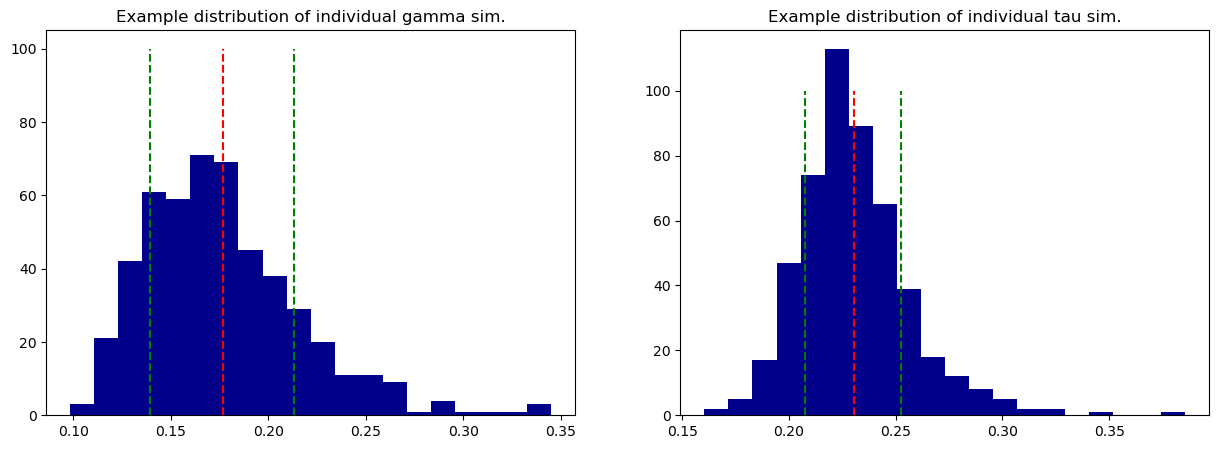

100%|██████████| 11/11 [00:01<00:00,  6.95it/s]


,An,dAn,Ci,dCis,gs,dgs,g_ias,dg_ias,gm_,dgm_,gamma,dgamma_low,dgamma_high,tau,dtau_low,dtau_high
0,9.49,0.69,322.347538,10.696934,0.11,0.01,1.28,0.23,0.033289,0.002774,0.176709,0.037084,0.036403,0.230672,0.023259,0.021897
1,7.96,1.02,229.421944,54.971188,0.04,0.02,1.32,0.26,0.046304,0.020416,0.065927,0.034188,0.033849,0.269260,0.069924,0.061480
2,7.92,1.16,273.258273,55.215953,0.06,0.03,1.21,0.12,0.035767,0.011704,0.103529,0.050326,0.049368,0.241394,0.043017,0.043880
3,7.63,0.78,250.195989,37.609248,0.05,0.01,0.98,0.15,0.037170,0.007622,0.104109,0.025516,0.025243,0.279239,0.037871,0.035780
4,7.00,1.40,232.201737,50.771183,0.04,0.01,1.10,0.02,0.039636,0.017438,0.074421,0.019680,0.019393,0.263674,0.061519,0.061529


In [19]:
# estimation for dehydrated conditions

Cis, dCis = est.estimate_Cis(An, dAn, gs, dgs, Ca, plot_sample=False)
gm_, dgm_ = est.estimate_gm_star(An, dAn, Cis, dCis, C_star, dC_star, plot_sample=False)

data_dehydrated = pd.DataFrame({'An':An, 'dAn':dAn, 'Ci':Cis, 'dCis':dCis, 'gs': gs, 'dgs': dgs, 'g_ias': gias, 'dg_ias': dgias, 'gm_': gm_, 'dgm_': dgm_})

data_dehydrated, tauDH, gammaDH = est.estimate_principle_parameters(data_dehydrated)
data_dehydrated.to_csv('data/Momayyezi_dehydrated.csv', index=False)
data_dehydrated.head()



 18%|█▊        | 2/11 [00:00<00:00, 11.75it/s]

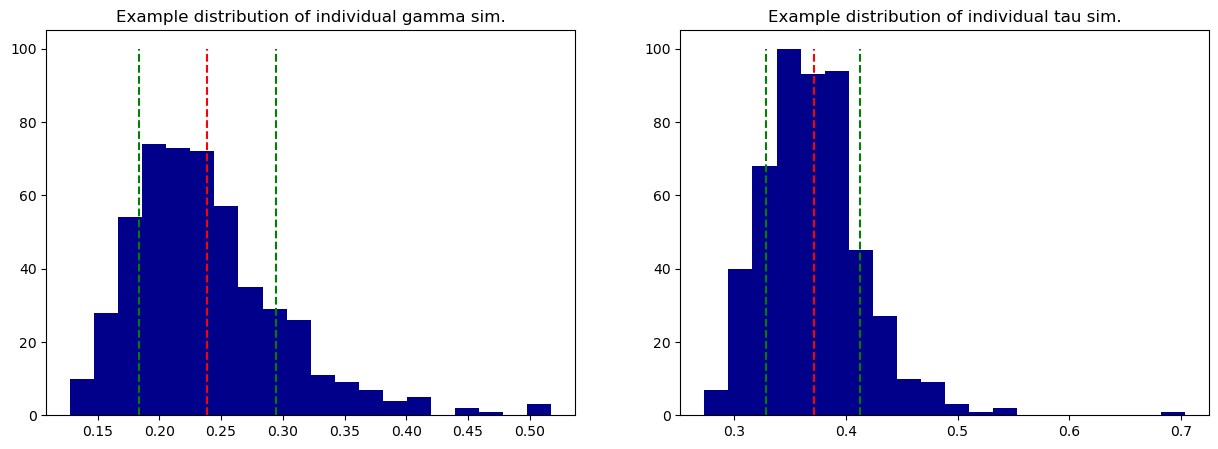

100%|██████████| 11/11 [00:01<00:00,  8.84it/s]


,An,dAn,Ci,dCis,gs,dgs,g_ias,dg_ias,gm_,dgm_,gamma,dgamma_low,dgamma_high,tau,dtau_low,dtau_high
0,11.982323,0.69,327.842070,7.372890,0.148649,0.01,1.098712,0.23,0.041367,0.002681,0.281861,0.058119,0.051672,0.281327,0.031218,0.029270
1,12.476489,1.02,275.056642,32.379787,0.095923,0.02,0.990248,0.26,0.053665,0.008819,0.210827,0.072312,0.070871,0.347109,0.056761,0.056824
2,16.097561,1.16,318.318144,17.977286,0.180723,0.03,0.893648,0.12,0.057758,0.005699,0.417056,0.087610,0.089770,0.369566,0.033646,0.032864
3,12.091918,0.78,273.569060,18.246796,0.090090,0.01,0.805921,0.15,0.051654,0.005351,0.238248,0.055014,0.055944,0.371387,0.042545,0.041197
4,16.166282,1.40,273.728610,16.606658,0.120120,0.01,0.881410,0.02,0.069322,0.007582,0.272898,0.024943,0.026305,0.407020,0.022606,0.023651


In [20]:
# estimation for drought conditions

Cis_watered, dCis_watered = est.estimate_Cis(An_watered, dAn_watered, gs_watered, dgs_watered, Ca, plot_sample=False)
gm_watered, dgm_watered = est.estimate_gm_star(An_watered, dAn_watered, Cis_watered, dCis_watered, C_star, dC_star, plot_sample=False)

data_watered = pd.DataFrame({'An':An_watered, 'dAn':dAn_watered, 'Ci':Cis_watered, 'dCis':dCis_watered, 'gs': gs_watered, 'dgs': dgs_watered, 'g_ias': gias_watered, 'dg_ias': dgias_watered, 'gm_': gm_watered, 'dgm_': dgm_watered})

data_watered, tauW, gammaW = est.estimate_principle_parameters(data_watered)
data_watered.to_csv('data/Momayyezi_watered.csv', index=False)
data_watered.head()

### Position on $(\tau, \gamma)$ plot

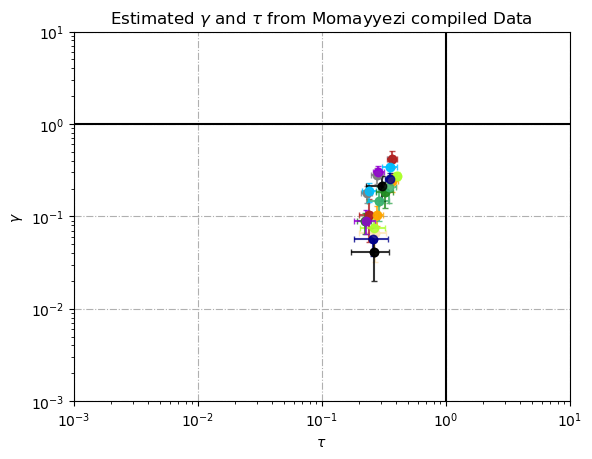

In [21]:
xmin, xmax = 1e-3, 1e1 # limits for the plot

datasets = [[tauDH, gammaDH], [tauW, gammaW]]
labels = ['Dehydrated', 'Well-watered']
colors = ['grey', 'moccasin', 'firebrick', 'orange', 'greenyellow', 'forestgreen', 'mediumseagreen', 'deepskyblue', 'darkblue', 'darkviolet', 'black']


sigmas = np.zeros((2, 11))
j = 0
for dataset, label in zip(datasets, labels):
    taus, dtaus = dataset[0]
    gammas, dgammas = dataset[1]
    for i in range(len(taus)):
        sigmas[j, i] = taus[i]*np.tanh(taus[i])/gammas[i]
        plt.errorbar(taus[i], gammas[i], xerr=[[dtaus.T[0,i]],[dtaus.T[1,i]]], yerr=[[dgammas.T[0,i]],[dgammas.T[1,i]]], fmt='o', capsize=2, zorder=2, alpha=0.8, color=colors[i], label=label)
        plt.scatter(taus[i], gammas[i], alpha=0.8, color=colors[i], zorder=3)
    j += 1
   

# layout
plt.title(r'Estimated $\gamma$ and $\tau$ from Momayyezi compiled Data')
plt.plot([xmin, xmax], [1, 1], color='black')
plt.plot([1, 1], [xmin, xmax], color='black')
plt.grid(linestyle='-.')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\gamma$')
plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
# plt.legend()
plt.show()

